## 크롤링

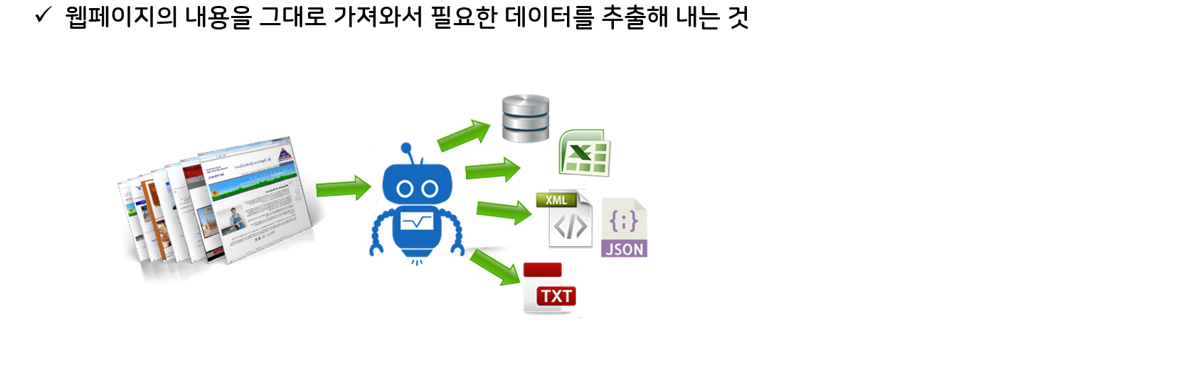
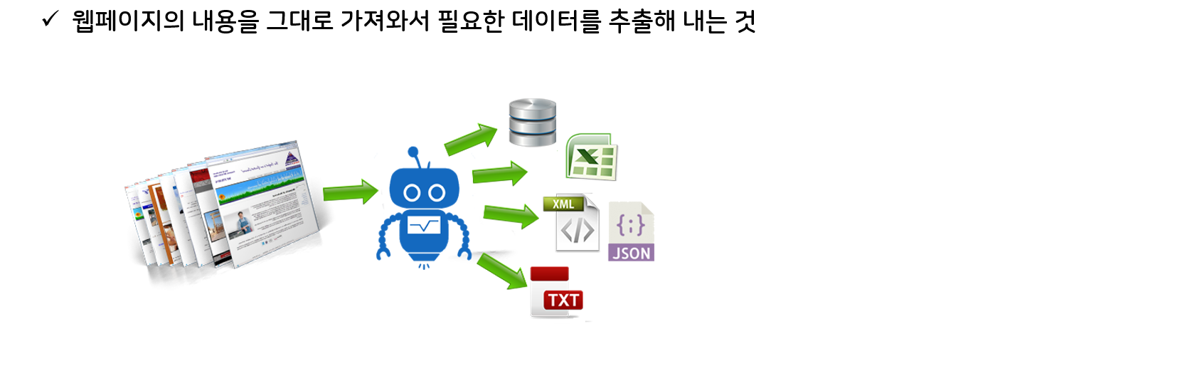

---

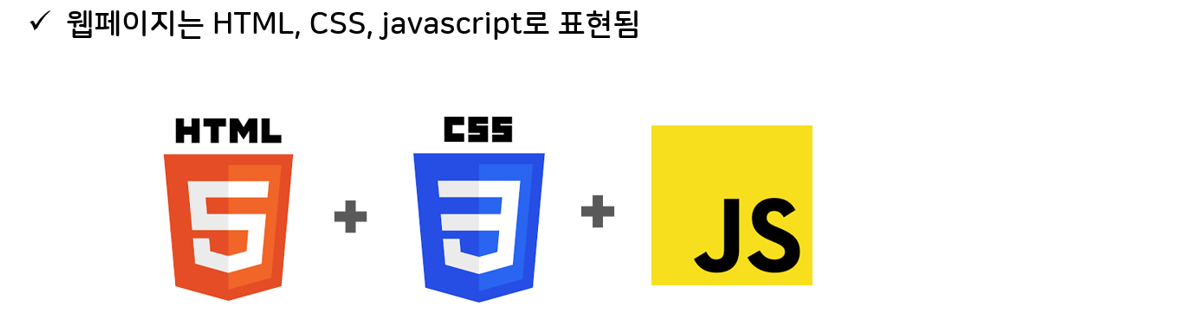
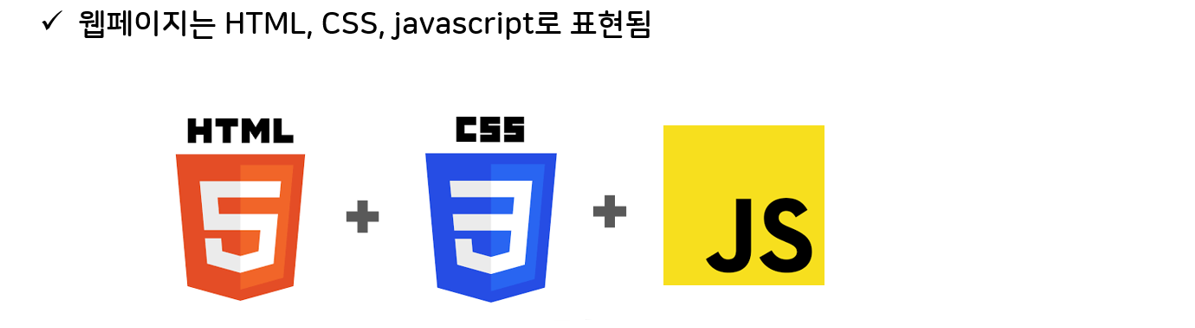

---

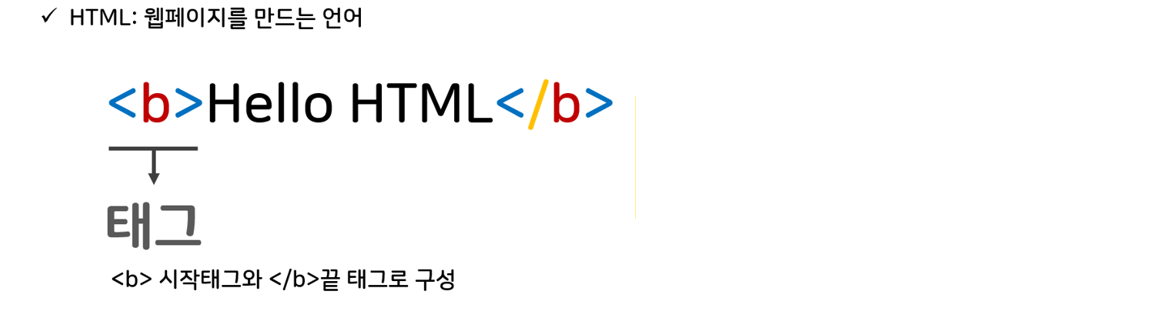
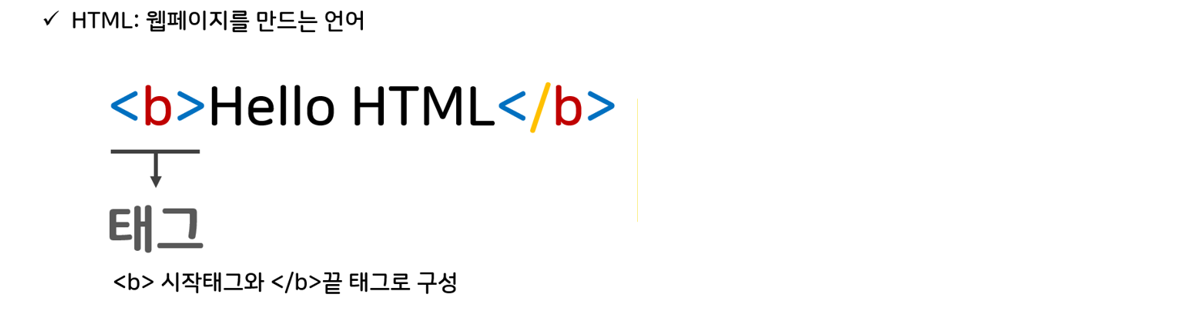

---

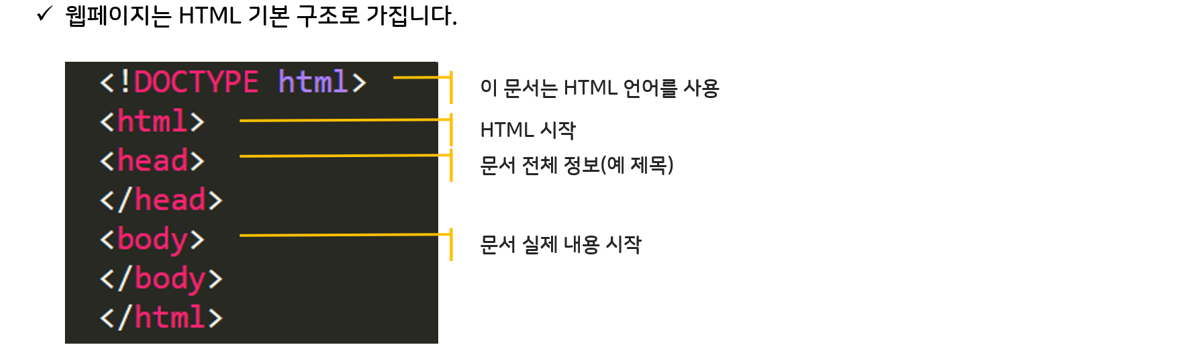
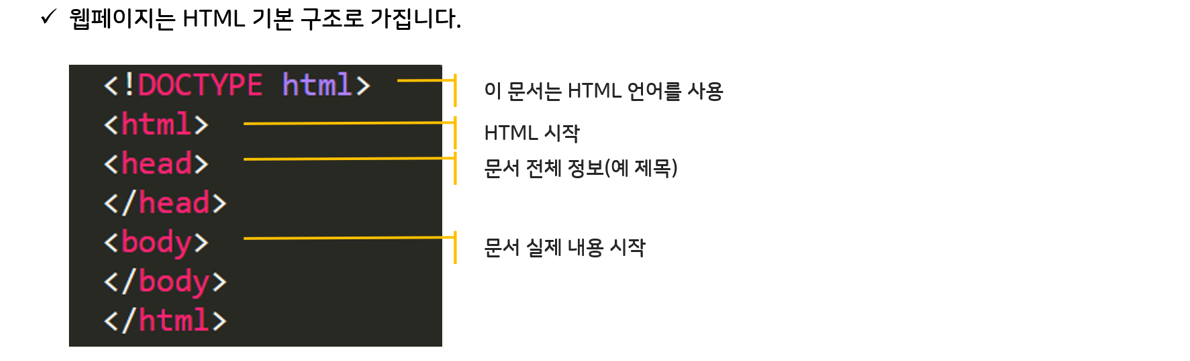

---

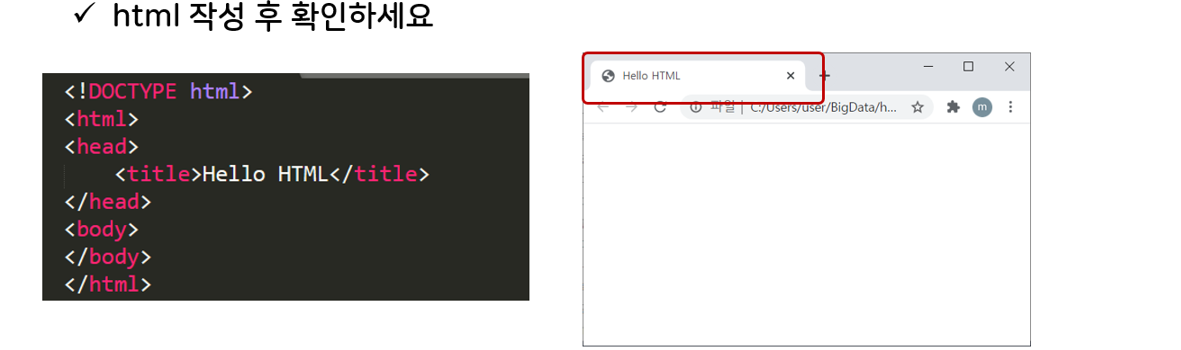
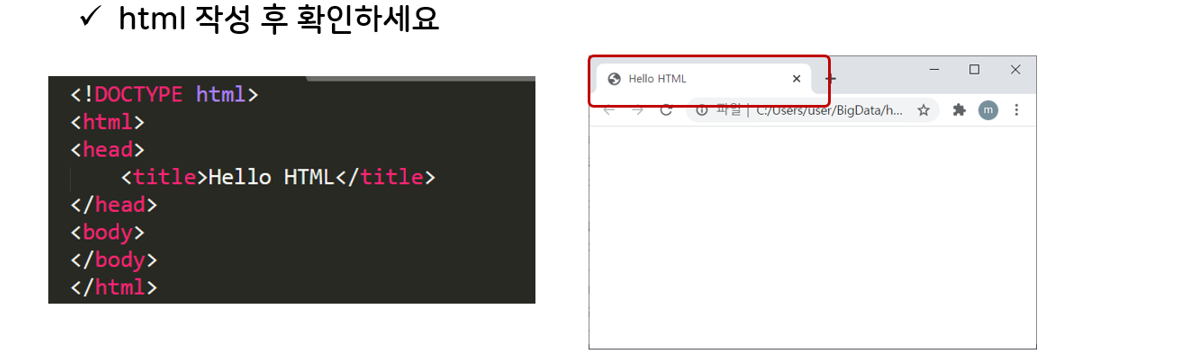

---

**[참고]**

https://www.w3schools.com/

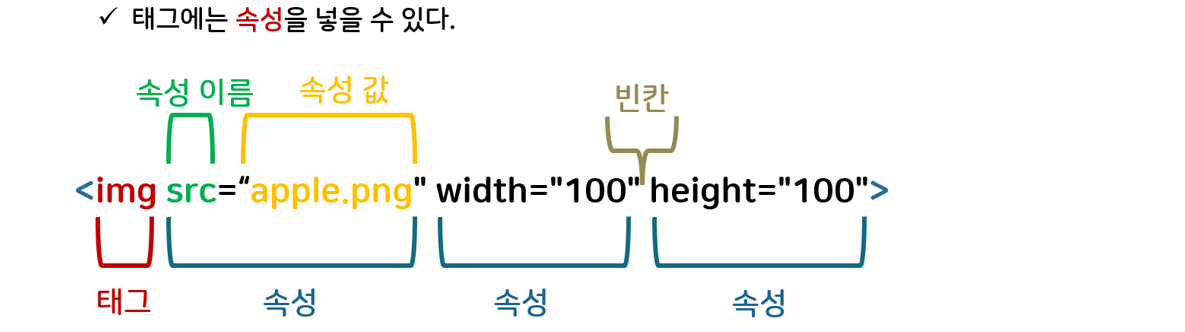
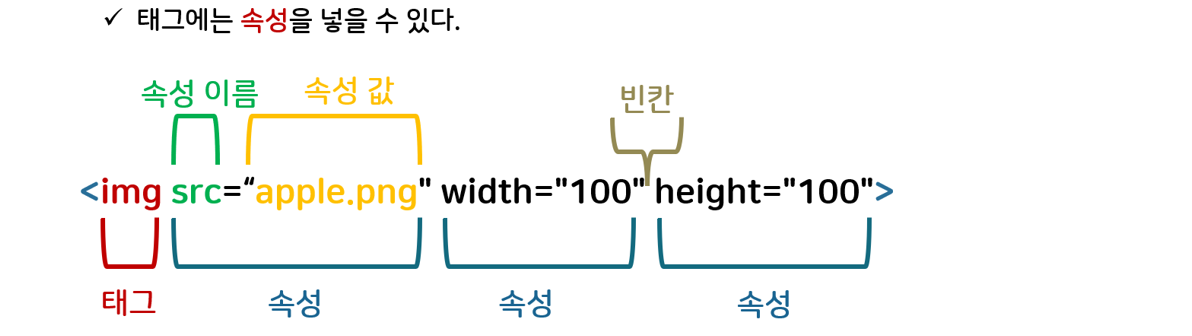

---

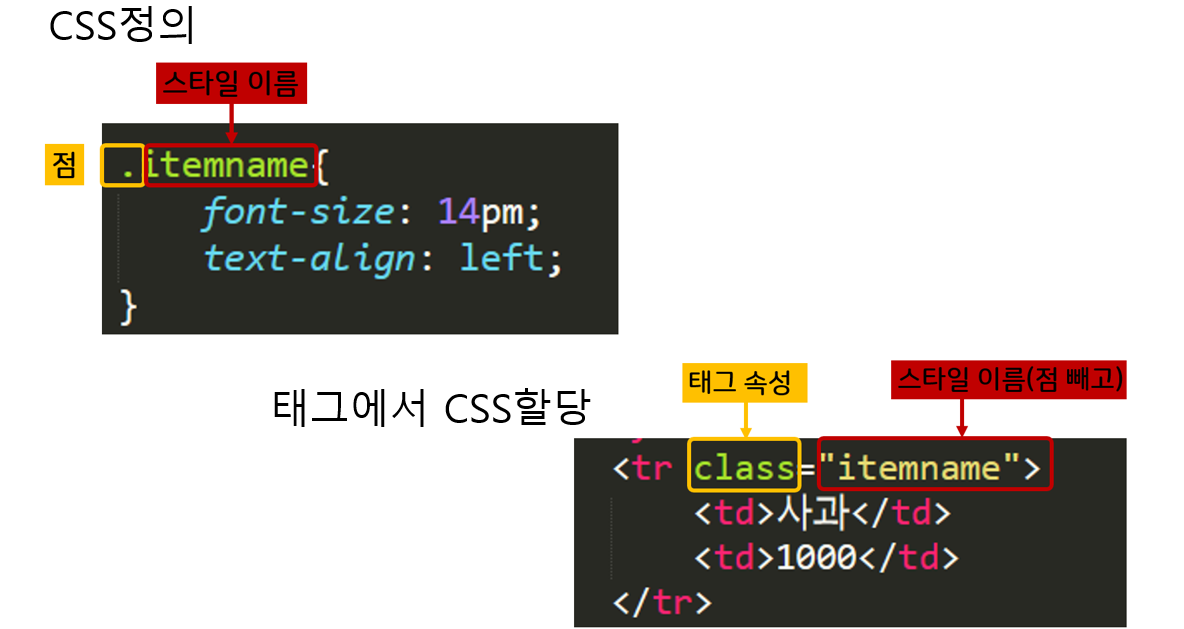
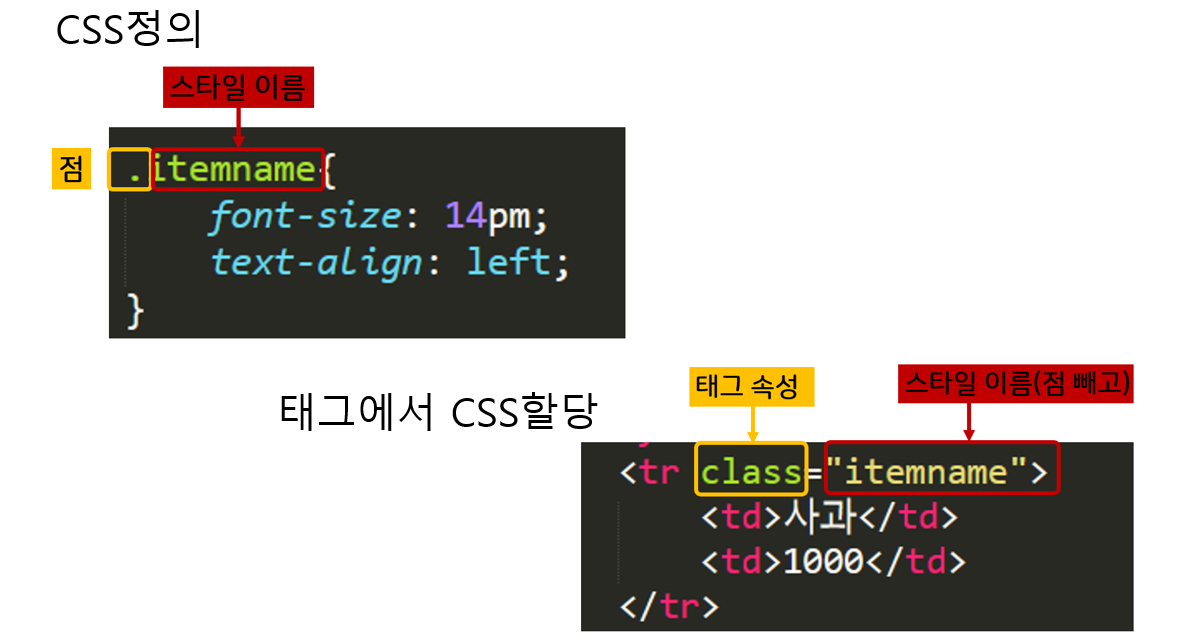


## 크롤링이란?

* 크롤링은 웹페이지의 정보를 추출해내는 기술입니다. 
* 크롤링을 통해서 얻은 데이터는 비정형 데이터에 속합니다. (OpenAPI, Dataset은 정형데이터)
* 따라서 웹페이지의 개편으로 구조의 변화가 있다면 잘 돌아가던 코드도 안 돌아갈 수도 있습니다.
* 눈에는 보이나 가져올 수 없도록 막아놓은 정보도 있어 수집하기가 까다로운 영역입니다.
* 하지만 인스타그램,유튜브 댓글, 네이버카페 글, 블로그 등은 하나의 집단의 의견,생각들이 반영된 공간이어서
* 소셜마케팅,전략 기획 등을 위해 많이 활용됩니다.
* 감춰진 데이터,동적으로 변하는 정보까지 가져오기 위해 selenium,scrapy등의 기술이 사용되며

---

# 인기 영화 한 눈에

* 각종 영화포털 사이트에서의 인기 영화 리스트를 한 눈에 보고 싶어합니다. 
* 네이버 웹페이지에 있는 인기 영화 리스트 정보를 우리회사에 가져와야 합니다. 

## 라이브러리 인스톨

In [1]:
!pip install BeautifulSoup4

  Using cached beautifulsoup4-4.11.1-py3-none-any.whl (128 kB)


In [2]:
!pip install pandas

     ---------------------------------------- 10.6/10.6 MB 9.9 MB/s eta 0:00:00
     ------------------------------------- 500.6/500.6 kB 10.4 MB/s eta 0:00:00
     --------------------------------------- 14.7/14.7 MB 10.9 MB/s eta 0:00:00


## 네이버 영화순위 크롤링후 저장

* https://movie.naver.com/movie/sdb/rank/rmovie.nhn
* 1위 ~ 50위까지 출력
* CSV 파일 형식으로 저장
* 200108네이버영화순위.csv 형식으로 저장

### 라이브러리 로드

In [4]:
!pip install requests

  Using cached requests-2.28.1-py3-none-any.whl (62 kB)
  Using cached charset_normalizer-2.1.1-py3-none-any.whl (39 kB)
     -------------------------------------- 160.4/160.4 kB 9.4 MB/s eta 0:00:00
     ---------------------------------------- 61.5/61.5 kB 3.4 MB/s eta 0:00:00
  Using cached urllib3-1.26.12-py2.py3-none-any.whl (140 kB)


In [5]:
import requests
# 오류날경우: 명령 프롬포트 -> pip install requests

In [6]:
from bs4 import BeautifulSoup  
# 오류날경우: 명령 프롬포트 -> pip install BeautifulSoup4

In [7]:
import requests  # URL 네트워크 요청과 응답
from bs4 import BeautifulSoup  # HTML을 HTML 답게 해석을 해서 객체로 만들어주는 라이브러리
import pandas as pd # 데이터를 구조화시키는 역할(파일저장)

### 웹페이지 가져오기

In [8]:
url = 'https://movie.naver.com/movie/sdb/rank/rmovie.nhn'

res = requests.get(url)

In [10]:
# res.content

### 웹페이지 파싱하기

In [11]:
soup = BeautifulSoup(res.content, 'html.parser') 


In [12]:
soup


<!DOCTYPE html>

<html lang="ko">
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="http://imgmovie.naver.com/today/naverme/naverme_profile.jpg" property="me2:image">
<meta content="네이버영화 " property="me2:post_tag">
<meta content="네이버영화" property="me2:category1"/>
<meta content="" property="me2:category2"/>
<meta content="랭킹 : 네이버 영화" property="og:title"/>
<meta content="영화, 영화인, 예매, 박스오피스 랭킹 정보 제공" property="og:description"/>
<meta content="article" property="og:type"/>
<meta content="https://movie.naver.com/movie/sdb/rank/rmovie.naver" property="og:url"/>
<meta content="http://static.naver.net/m/movie/icons/OG_270_270.png" property="og:image"/><!-- http://static.naver.net/m/movie/im/navermovie.jpg -->
<meta content="http://imgmovie.naver.com/today/naverme/naverme_profile.jpg" property="og:article:thumbnailUrl"/>
<meta content="네이버 영화" property="og:article:author"/>
<meta content="https://m

### Html에서 데이터 추출하기

In [14]:
title_lst = soup.select('div.tit3')
title_lst

[<div class="tit3">
 <a href="/movie/bi/mi/basic.naver?code=201641" title="공조2: 인터내셔날">공조2: 인터내셔날</a>
 </div>,
 <div class="tit3">
 <a href="/movie/bi/mi/basic.naver?code=204640" title="육사오(6/45)">육사오(6/45)</a>
 </div>,
 <div class="tit3">
 <a href="/movie/bi/mi/basic.naver?code=195758" title="헌트">헌트</a>
 </div>,
 <div class="tit3">
 <a href="/movie/bi/mi/basic.naver?code=184519" title="비상선언">비상선언</a>
 </div>,
 <div class="tit3">
 <a href="/movie/bi/mi/basic.naver?code=194196" title="한산: 용의 출현">한산: 용의 출현</a>
 </div>,
 <div class="tit3">
 <a href="/movie/bi/mi/basic.naver?code=214552" title="놉">놉</a>
 </div>,
 <div class="tit3">
 <a href="/movie/bi/mi/basic.naver?code=81888" title="탑건: 매버릭">탑건: 매버릭</a>
 </div>,
 <div class="tit3">
 <a href="/movie/bi/mi/basic.naver?code=202465" title="블랙폰">블랙폰</a>
 </div>,
 <div class="tit3">
 <a href="/movie/bi/mi/basic.naver?code=193324" title="리미트">리미트</a>
 </div>,
 <div class="tit3">
 <a href="/movie/bi/mi/basic.naver?code=187347" title="토르: 러브 앤 썬더

In [16]:
title_lst[0]

<div class="tit3">
<a href="/movie/bi/mi/basic.naver?code=201641" title="공조2: 인터내셔날">공조2: 인터내셔날</a>
</div>

In [17]:
title_lst[0].get_text()

'\n공조2: 인터내셔날\n'

In [18]:
title_lst[0].select('a')

[<a href="/movie/bi/mi/basic.naver?code=201641" title="공조2: 인터내셔날">공조2: 인터내셔날</a>]

In [19]:
title_lst[0].select('a')[0].get_text()

'공조2: 인터내셔날'

In [22]:
# 영화타이틀 리스트만들고 이를 출력하세요.
title_lst = soup.select('div.tit3')

tit_list=[]
for title in title_lst :
#   tit = title.get_text().strip()
  tit = title.select('a')[0].get_text()
#   tit = title.select('a')[0]['title']
  tit_list.append(tit)
tit_list

['공조2: 인터내셔날',
 '육사오(6/45)',
 '헌트',
 '비상선언',
 '한산: 용의 출현',
 '놉',
 '탑건: 매버릭',
 '블랙폰',
 '리미트',
 '토르: 러브 앤 썬더',
 '늑대사냥',
 '비스트',
 '외계+인 1부',
 '불릿 트레인',
 '어웨이크',
 '파로호',
 '폴: 600미터',
 '드래곤볼 슈퍼: 슈퍼 히어로',
 '9명의 번역가',
 '알라딘',
 '어쩌다 공주, 닭냥이 왕자를 부탁해!',
 '모가디슈',
 '인생은 뷰티풀: 비타돌체',
 '공조',
 '서울대작전',
 '극장판 엄마 까투리: 도시로 간 까투리 가족 ',
 '아바타',
 '오! 마이 고스트',
 '뜨거운 피',
 '특송',
 '보이스',
 '헤어질 결심',
 '미니언즈2',
 '발신제한',
 '성적표의 김민영',
 '노스맨',
 '경관의 피',
 '범죄도시2',
 '유체이탈자',
 '인생은 아름다워',
 '장르만 로맨스',
 '연애 빠진 로맨스',
 '킹메이커',
 '다 잘된 거야',
 '정직한 후보2',
 '부적: 남의 운을 빼앗는 자',
 '시맨틱 에러: 더 무비',
 '신비한 동물들과 덤블도어의 비밀',
 '신의 한 수: 귀수편',
 '강릉']

In [23]:
tit_list=[]
for i in range(0,50):
    tit_list = title_lst[i].select_one('a').text
    print(f'{i}. {tit_list}')
    
    
    

0. 공조2: 인터내셔날
1. 육사오(6/45)
2. 헌트
3. 비상선언
4. 한산: 용의 출현
5. 놉
6. 탑건: 매버릭
7. 블랙폰
8. 리미트
9. 토르: 러브 앤 썬더
10. 늑대사냥
11. 비스트
12. 외계+인 1부
13. 불릿 트레인
14. 어웨이크
15. 파로호
16. 폴: 600미터
17. 드래곤볼 슈퍼: 슈퍼 히어로
18. 9명의 번역가
19. 알라딘
20. 어쩌다 공주, 닭냥이 왕자를 부탁해!
21. 모가디슈
22. 인생은 뷰티풀: 비타돌체
23. 공조
24. 서울대작전
25. 극장판 엄마 까투리: 도시로 간 까투리 가족 
26. 아바타
27. 오! 마이 고스트
28. 뜨거운 피
29. 특송
30. 보이스
31. 헤어질 결심
32. 미니언즈2
33. 발신제한
34. 성적표의 김민영
35. 노스맨
36. 경관의 피
37. 범죄도시2
38. 유체이탈자
39. 인생은 아름다워
40. 장르만 로맨스
41. 연애 빠진 로맨스
42. 킹메이커
43. 다 잘된 거야
44. 정직한 후보2
45. 부적: 남의 운을 빼앗는 자
46. 시맨틱 에러: 더 무비
47. 신비한 동물들과 덤블도어의 비밀
48. 신의 한 수: 귀수편
49. 강릉


### 필요한 데이터 추출하기

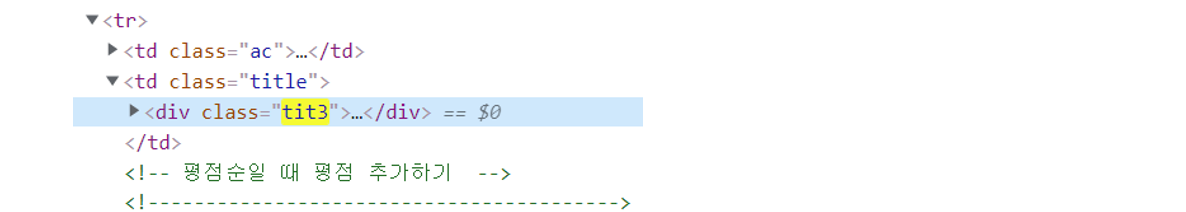

In [25]:
# 순위도 리스트에 저장

rank_list=[]
tit_list=[]

for ix, tit in enumerate(title_lst) :
    tit_list.append(title_lst[ix].select('a')[0].get_text())
    rank_list.append(ix + 1)
# print(tit_list)
print(rank_list)



[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]


### 데이터 프레임 만들기

In [31]:
df = pd.DataFrame({'순위':rank_list,'제목':tit_list})
df.set_index('순위',inplace=True)
df.head()

,제목
순위,
1,공조2: 인터내셔날
2,육사오(6/45)
3,헌트
4,비상선언
5,한산: 용의 출현


### 오늘 날짜 만들기

In [26]:
import datetime
date_today=datetime.date.today()
day=date_today.strftime('%y%m%d')
day

'220914'

In [29]:
from datetime import datetime

day = datetime.today().strftime('%y%m%d')
day

'220914'

### CSV 파일로 저장하기

In [36]:
df.to_csv('{}_네이버영화순위.csv'.format(day), encoding='euc-kr')

#220914_네이버영화순위.csv 

---
## 종합코드

In [33]:
#라이브러리 로드
import requests  # URL 네트워크 요청과 응답
from bs4 import BeautifulSoup  # HTML을 HTML 답게 해석을 해서 객체로 만들어주는 라이브러리
import pandas as pd # 데이터를 구조화시키는 역할(파일저장)

#URL 요청
url = 'https://movie.naver.com/movie/sdb/rank/rmovie.nhn'
res = requests.get(url)

#파싱하기하고 태그 추출
soup = BeautifulSoup(res.content, 'html.parser') 
title_lst = soup.select('div.tit3')

#태그에서 정보 추출
rank_list=[]
tit_list=[]

for ix, tit in enumerate(title_lst) :
    tit_list.append(title_lst[ix].select('a')[0].get_text())
    rank_list.append(ix + 1)
# print(tit_list)
# print(rank_list)

#데이터프레임으로 만들기
df = pd.DataFrame({'순위':rank_list,'제목':tit_list})
df.set_index('순위',inplace=True)

#오늘의 날짜
from datetime import datetime
day = datetime.today().strftime('%y%m%d')

#csv파일 저장
df.to_csv('{}_네이버영화순위.csv'.format(day), encoding='euc-kr')

---

## 미션: 매월 1일 영화순위를 가져와 파일로 만들기

* 220101_네이버영화순위.csv
* 220201_네이버영화순위.csv
* 220301_네이버영화순위.csv
* 220401_네이버영화순위.csv
* 220501_네이버영화순위.csv


In [ ]:
dd = '220101'

movie_ranking(dd)

In [37]:
#라이브러리 로드
import requests  # URL 네트워크 요청과 응답
from bs4 import BeautifulSoup  # HTML을 HTML 답게 해석을 해서 객체로 만들어주는 라이브러리
import pandas as pd # 데이터를 구조화시키는 역할(파일저장)

#URL 요청
url = 'https://movie.naver.com/movie/sdb/rank/rmovie.naver?sel=cnt&tg=0&date=2022{}01'
# url = 'https://movie.naver.com/movie/sdb/rank/rmovie.naver?sel=cnt&tg=0&date=20220201'
# url = 'https://movie.naver.com/movie/sdb/rank/rmovie.naver?sel=cnt&tg=0&date=20220301'
# url = 'https://movie.naver.com/movie/sdb/rank/rmovie.naver?sel=cnt&tg=0&date=20220401'
# url = 'https://movie.naver.com/movie/sdb/rank/rmovie.naver?sel=cnt&tg=0&date=20220501'
# url = 'https://movie.naver.com/movie/sdb/rank/rmovie.naver?sel=cnt&tg=0&date=20220601'
res = requests.get(url)

In [43]:
furl = 'https://movie.naver.com/movie/sdb/rank/rmovie.naver?sel=cnt&tg=0&date=2022{:02d}01'

for i in range(1,13):
    url = furl.format(i)
    
    res = requests.get(url)

    #파싱하기하고 태그 추출
    soup = BeautifulSoup(res.content, 'html.parser') 
    title_lst = soup.select('div.tit3')

    #태그에서 정보 추출
    rank_list=[]
    tit_list=[]

    for ix, tit in enumerate(title_lst) :
        tit_list.append(title_lst[ix].select('a')[0].get_text())
        rank_list.append(ix + 1)
    # print(tit_list)
    # print(rank_list)

    #데이터프레임으로 만들기
    df = pd.DataFrame({'순위':rank_list,'제목':tit_list})
    df.set_index('순위',inplace=True)

    #오늘의 날짜
    from datetime import datetime
    day = datetime.today().strftime('%y%m%d')

    #csv파일 저장
    df.to_csv('{}_네이버영화순위.csv'.format(day), encoding='euc-kr')
    

---

* for, list, datetime, 파일IO, 객체 internation